In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['text.usetex'] = True

### Filtering

In [3]:
#df_filter = df[(df['m']<=50) & (df['sparsity']==.5)]#& (dft['ncoeff']==0.1) dft['sparsity']==1.) &

In [44]:
df_filter = df

In [4]:
from testproblems import random_problem_with_artifacts

In [5]:
stats = []
for elt in df.itertuples():
    kwargs = random_problem_with_artifacts(elt.m,elt.n,elt.seed,elt.sparsity,independent_of_n=False)
    eq_incidence,outset,eqnidxs,edges_varonleft,varidxs = map(kwargs.get, ["eq_incidence","outset","eqnidxs","edges_varonleft","varidxs"])
    stats.append(np.mean([len(val) for val in eq_incidence.values()]))

In [6]:
min(stats), max(stats)

(2.7, 4.2)

In [5]:
df_post_process = df.copy()

In [6]:
def recover_value(str_or_num):
    if isinstance(str_or_num, str):
        return float(str_or_num.strip('[').strip(']'))
    else:
        return str_or_num

In [4]:
df = pd.read_csv('results_10x15_sparsity_1.csv', index_col=0)

In [7]:
df_post_process["fobjval"] = df["fobj"].apply(recover_value)

In [8]:
converged = df_post_process["fobjval"] <= 0.1

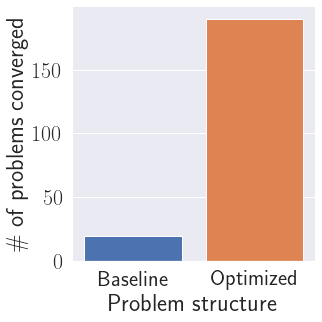

In [15]:
sns.set(font_scale = 2)
g = sns.catplot(data=df_post_process[converged], x="prob_type", kind="count", palette="deep", aspect=1, saturation=1);
#sns.move_legend(g, "lower center",
#    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True) #https://seaborn.pydata.org/generated/seaborn.move_legend.html
new_labels = ['Block reduced', 'Simple reduced']
# for t, l in zip(g.legend.texts, new_labels):
#      t.set_text(l)
g.set_axis_labels("Problem structure", "\# of problems converged")
g.set_xticklabels(['Baseline','Optimized']);
plt.savefig('synthetic_10x15_sparsity_1_convergence_statistics.png', dpi=200, bbox_inches='tight')

In [67]:
seed1 = df[(df["seed"]==1) & converged]
seed1_optimalstruct = seed1[seed1["prob_type"]==2]
seed1_optimalstruct_block = seed1_optimalstruct[seed1_optimalstruct["mdf"]]

In [68]:
seed1

,m,ncoeff,n,sparsity,seed,poly_seed,prob_type,mdf,maxscc,fobj,solveriter,optiter,time
40,10,0.5,15,1.0,1,0,2,True,2,[0.],804.0,4.0,33.195398
44,10,0.5,15,1.0,1,1,2,True,2,[0.],9.0,4.0,0.805230
45,10,0.5,15,1.0,1,1,2,False,2,[4.92432976e-21],0.0,10.0,1.895820
47,10,0.5,15,1.0,1,1,1,False,2,[5.88337316e-10],0.0,64.0,10.851638
48,10,0.5,15,1.0,1,2,2,True,2,[0.],9.0,4.0,0.778201
49,10,0.5,15,1.0,1,2,2,False,2,[1.26223218e-21],0.0,10.0,1.963186
57,10,0.5,15,1.0,1,4,2,False,2,[8.59631757e-08],0.0,382.0,45.652988
60,10,0.5,15,1.0,1,5,2,True,2,[0.],804.0,4.0,36.517697
65,10,0.5,15,1.0,1,6,2,False,2,[1.12488626e-05],0.0,398.0,55.422295
69,10,0.5,15,1.0,1,7,2,False,2,[7.32172348e-08],0.0,398.0,51.034172


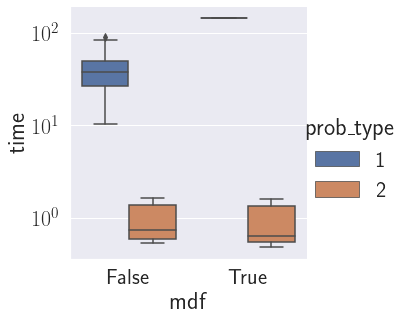

In [39]:
sns.set(font_scale = 2)
ax = sns.catplot(data=seed1, x="mdf", y="time",
                hue="prob_type",
                kind="box");
ax.set(yscale = 'log');

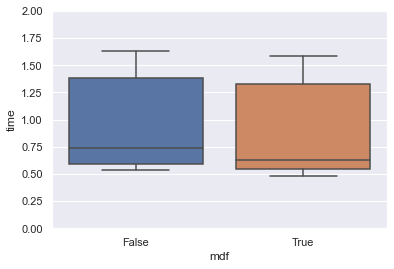

In [23]:
ax = sns.boxplot(data=seed1_optimalstruct, y="time", x="mdf")
ax.set(ylim=(0, 2));

In [7]:
ax = sns.boxplot(df[df["seed"]==1]

,m,ncoeff,n,sparsity,seed,poly_seed,prob_type,mdf,maxscc,fobj,solveriter,optiter,time
40,10,0.5,15,1.0,1,0,2,True,2,[0.],804.0,4.0,33.195398
41,10,0.5,15,1.0,1,0,2,False,2,[3995624.73581958],0.0,383.0,44.632561
42,10,0.5,15,1.0,1,0,1,True,2,999,NaN,NaN,NaN
43,10,0.5,15,1.0,1,0,1,False,2,[22618.32614422],0.0,392.0,37.130245
44,10,0.5,15,1.0,1,1,2,True,2,[0.],9.0,4.0,0.805230
45,10,0.5,15,1.0,1,1,2,False,2,[4.92432976e-21],0.0,10.0,1.895820
46,10,0.5,15,1.0,1,1,1,True,2,[0.20398405],407.0,54.0,21.143147
47,10,0.5,15,1.0,1,1,1,False,2,[5.88337316e-10],0.0,64.0,10.851638
48,10,0.5,15,1.0,1,2,2,True,2,[0.],9.0,4.0,0.778201
49,10,0.5,15,1.0,1,2,2,False,2,[1.26223218e-21],0.0,10.0,1.963186


In [ ]:
ax = sns.boxplot(x="day", y="total_bill", hue="time",
                 data=tips, linewidth=2.5)

## Plot

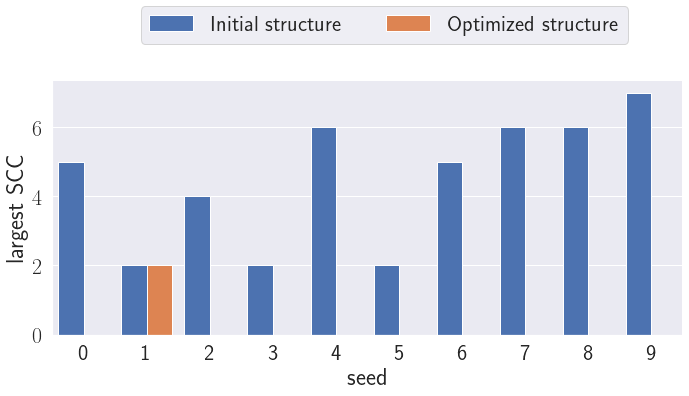

In [204]:
sns.set(font_scale = 2)
g = sns.catplot(data=df_post_process, x="seed", y="maxscc", hue="prob_type", palette="deep", kind="bar", aspect=2, saturation=1, legend=True);
sns.move_legend(g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True) #https://seaborn.pydata.org/generated/seaborn.move_legend.html
new_labels = ['Initial structure', 'Optimized structure']
for t, l in zip(g.legend.texts, new_labels):
     t.set_text(l)
g = (g.set_axis_labels("seed","largest SCC")).set(xticks=(xticks));
plt.savefig('synthetic_10x15_sparsity_1_scc_size.png', dpi=200, bbox_inches='tight')

## Converged

In [114]:
df_post_process["fobjval"] = df["fobj"].apply(recover_value)
converged = df_post_process["fobjval"] <= 0.1

In [115]:
df_post_process["mdfval"] = df_post_process["mdf"].apply(lambda x: "MDF" if x else "IDF")

In [116]:
df_post_process["prob_subtype"] = df_post_process[['prob_type', 'mdfval']].apply(tuple, axis=1)

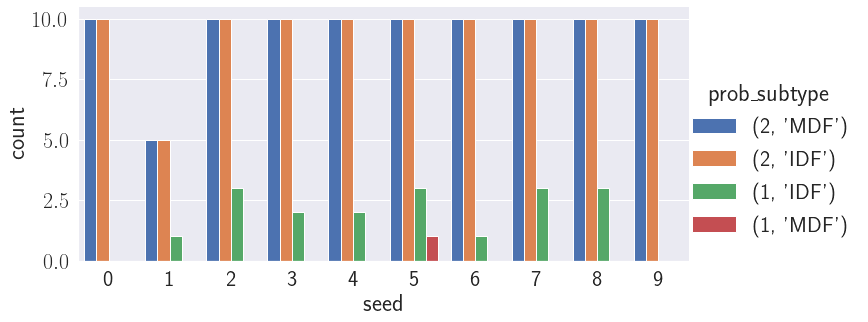

In [205]:
sns.set(font_scale = 2)
sns.catplot(data=df_post_process[converged], x="seed", hue="prob_subtype", kind="count", palette="deep", aspect=2, saturation=1);
plt.savefig('synthetic_10x15_sparsity_1_convergence.png', dpi=200, bbox_inches='tight')

## Timing

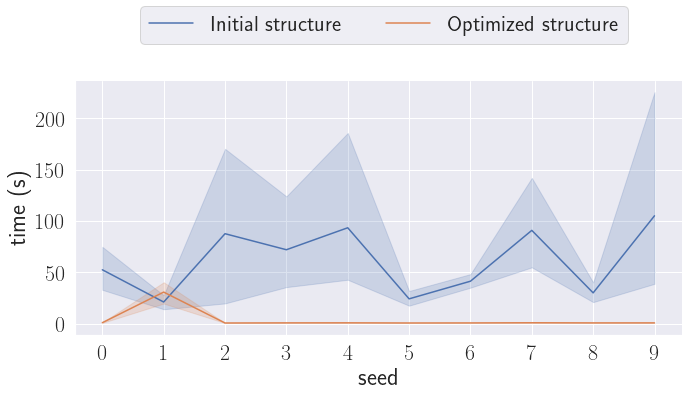

In [201]:
sns.set(font_scale = 2)
xticks = df["seed"].unique()
g = sns.relplot(data=df_filter, x="seed",  y="time", hue="prob_type", palette="deep", kind="line", aspect=2);
sns.move_legend(g, "lower center",
    bbox_to_anchor=(.5, 1), ncol=2, title=None, frameon=True) #https://seaborn.pydata.org/generated/seaborn.move_legend.html
new_labels = ['Initial structure', 'Optimized structure']
for t, l in zip(g.legend.texts, new_labels):
     t.set_text(l)
g = (g.set_axis_labels("seed","time (s)")).set(xticks=(xticks))
plt.savefig('synthetic_10x15_sparsity_1_compute_time.png', dpi=200, bbox_inches='tight')